In [ ]:
import pandas as pd

In [ ]:
path="/content/social network ads.csv"
df=pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
x=df[["Age","EstimatedSalary","Gender"]]
y=df["Purchased"]
print(x,y)

     Age  EstimatedSalary  Gender
0     19            19000       1
1     35            20000       1
2     26            43000       0
3     27            57000       0
4     19            76000       1
..   ...              ...     ...
395   46            41000       0
396   51            23000       1
397   50            20000       0
398   36            33000       1
399   49            36000       0

[400 rows x 3 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train,x_test,y_train,y_test)

     Age  EstimatedSalary  Gender
33    28            44000       0
385   56            60000       1
105   21            72000       1
354   36            99000       1
323   48            30000       0
..   ...              ...     ...
178   24            23000       1
93    29            28000       0
371   60            83000       1
223   60           102000       1
98    35            73000       1

[320 rows x 3 columns]      Age  EstimatedSalary  Gender
310   42            70000       0
143   30            89000       1
109   38            80000       0
372   39            73000       0
295   36            63000       0
..   ...              ...     ...
94    29            83000       0
395   46            41000       0
10    26            80000       0
262   55           125000       0
140   19            85000       1

[80 rows x 3 columns] 33     0
385    1
105    0
354    1
323    1
      ..
178    0
93     0
371    1
223    1
98     0
Name: Purchased, Length: 320, dtype: i

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[46,  8],
       [ 8, 18]])

Text(0.5, 427.9555555555555, 'Predicted label')

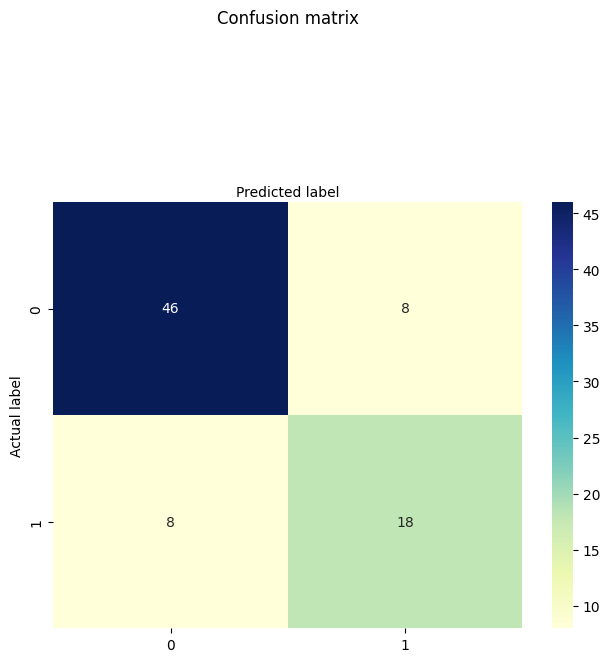

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.4)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.6923076923076923
recall: 0.6923076923076923
